In [1]:
' Import required modules '
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import squarify
import matplotlib.style as style
%matplotlib inline

In [2]:
' Read in Data Files '
securities = pd.read_csv("./Data/securities.csv")
fundamental_data = pd.read_csv("./Data/fundamentals.csv")
adj_prices = pd.read_csv("./Data/prices-split-adjusted.csv")

In [3]:
fundamental_data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
' Combine company details with fundamental data '
fundamentals = pd.merge(fundamental_data,securities,left_on='Ticker Symbol',right_on='Ticker symbol',how='inner')

' Split up "Period Ending" column into day, month and year columns '
fundamentals['Date']=pd.to_datetime(fundamentals['Period Ending'])
fundamentals['Year']=fundamentals['Date'].dt.year
fundamentals['Month']=fundamentals['Date'].dt.month
fundamentals['Day']=fundamentals['Date'].dt.day

' Add year, column and month to price data '
adj_prices['Date']=pd.to_datetime(adj_prices['date'])
adj_prices['Year']=adj_prices['Date'].dt.year
adj_prices['Month']=adj_prices['Date'].dt.month
adj_prices['Day']=adj_prices['Date'].dt.day

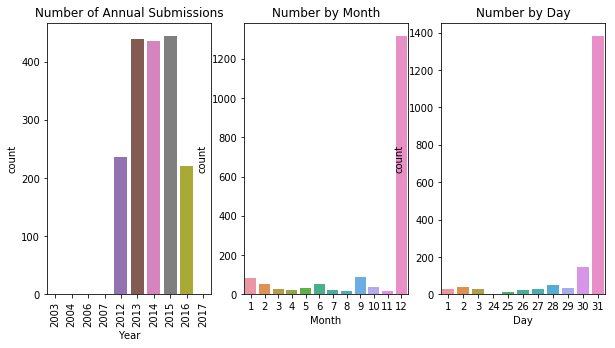

In [5]:
plt.rcParams["figure.figsize"]=10,5

plt.subplot(1,3,1)
by_year = sns.countplot(x='Year',data=fundamentals);
plt.title('Number of Annual Submissions');
plt.setp(by_year.get_xticklabels(), rotation=90);

plt.subplot(1,3,2)
sns.countplot(x='Month',data=fundamentals);
plt.title('Number by Month');

plt.subplot(1,3,3)
sns.countplot(x='Day',data=fundamentals);
plt.title('Number by Day');


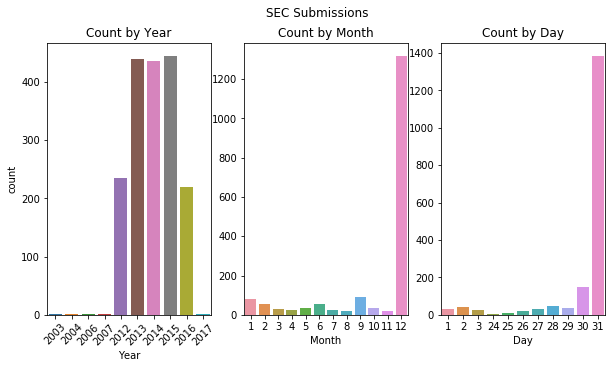

In [6]:
plt.rcParams["figure.figsize"]=10,5

fig=plt.figure()

fig.add_subplot(1,3,1)
by_year = sns.countplot(x='Year',data=fundamentals);
plt.title('Count by Year');
plt.setp(by_year.get_xticklabels(), rotation=45);

fig.add_subplot(1,3,2)
ax = sns.countplot(x='Month',data=fundamentals);
ax.set_ylabel('')  
plt.title('Count by Month');

fig.add_subplot(1,3,3)
ax = sns.countplot(x='Day',data=fundamentals);
ax.set_ylabel('')  
plt.title('Count by Day');

fig.suptitle('SEC Submissions'); # or plt.suptitle('Main title')

fig.savefig('./Figures/SECcount.png')

445 companies submitted in 2015


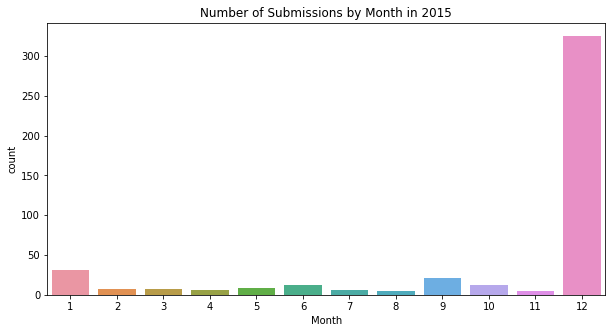

In [7]:
' Extract filings for 2015 '
fundamentals2015 = fundamentals[fundamentals['Year']==2015]
sns.countplot(x='Month',data=fundamentals2015);
plt.title('Number of Submissions by Month in 2015');
print(str(fundamentals2015['Ticker Symbol'].nunique())+ " companies submitted in 2015")

In [8]:
' Obtain closing price of all companies on last trading day of 2015 '
last_close_price_in_2015 = adj_prices[adj_prices['date']=='2015-12-31'][['symbol','close']]
last_close_price_in_2015.columns = ['symbol','priceDec2015']

' Combine with 2015 fundamental data '
marketCap2015 = pd.merge(fundamentals2015,last_close_price_in_2015,left_on='Ticker Symbol',right_on='symbol',how='inner')

' Remove redundant column '
del marketCap2015['symbol']

' Calculate market cap: Note that we are missing 32 values due to missing values for Estimated Shares Outstanding '
marketCap2015['Market Cap'] = marketCap2015['priceDec2015']*marketCap2015['Estimated Shares Outstanding']/1000000000


In [9]:
marketCap2015[['Ticker Symbol','Security','Market Cap']].sort_values(by='Market Cap',ascending=False).head()

,Ticker Symbol,Security,Market Cap
2,AAPL,Apple Inc.,605.630662
276,MSFT,Microsoft Corp.,454.005128
434,XOM,Exxon Mobil Corp.,326.985052
30,AMZN,Amazon.com Inc,314.711288
419,WFC,Wells Fargo,297.731546


In [335]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

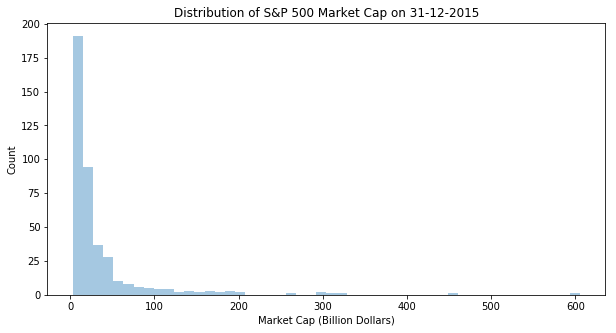

In [10]:
nonNullValues = pd.notnull(marketCap2015['Market Cap']);
fig=plt.figure()
ax = sns.distplot(marketCap2015[nonNullValues]['Market Cap'], kde=False, bins=50);
plt.xlabel("Market Cap (Billion Dollars)")
plt.ylabel("Count")
plt.title('Distribution of S&P 500 Market Cap on 31-12-2015');
fig.savefig('./Figures/MarketCap.png')

<Figure size 720x360 with 0 Axes>

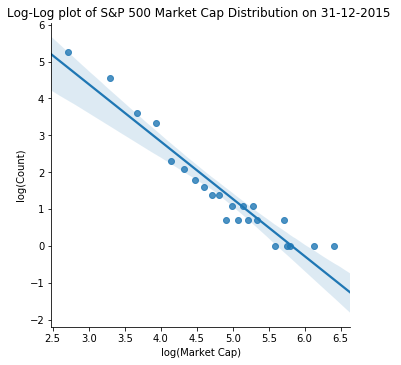

In [13]:
x = []
y = []
for p in ax.patches:
    x.append(p.get_bbox().get_points()[1,0]);
    y.append(p.get_bbox().get_points()[1,1]);
    
#marketCapFreq = pd.DataFrame({'Market Cap': np.log(x), 'Frequency': np.log(y)})
marketCapFreq = pd.DataFrame({'Market Cap': x, 'Frequency': y})

' Remove Zero counts '
marketCapFreq = marketCapFreq[marketCapFreq['Frequency']>0]

' Take logarithm '
marketCapFreq = np.log(marketCapFreq)
fig=plt.figure()
sns.lmplot(x='Market Cap',y='Frequency',data=marketCapFreq);
plt.xlabel("log(Market Cap)")
plt.ylabel("log(Count)")
plt.title('Log-Log plot of S&P 500 Market Cap Distribution on 31-12-2015 ')
fig.savefig('./Figures/MarketCapLog.png')

In [21]:
' Calculate return for 2015 '
first_close_price_in_2015 = adj_prices[adj_prices['date']=='2015-01-02'][['symbol','close']]
first_close_price_in_2015.columns = ['symbol','priceJan2015']

' Combine with 2015 fundamental data '
marketCap2015 = pd.merge(marketCap2015,first_close_price_in_2015,left_on='Ticker Symbol',right_on='symbol',how='inner')

' Remove redundant column '
del marketCap2015['symbol']

' Calculate annual return '
marketCap2015['Annual Return'] = 100*(marketCap2015['priceDec2015'] - marketCap2015['priceJan2015'])/marketCap2015['priceJan2015']


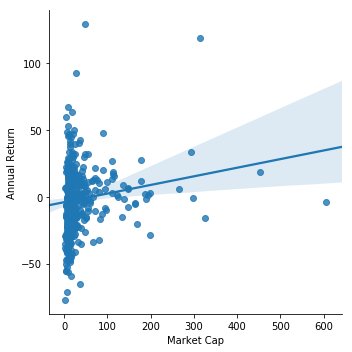

In [22]:
' Return for 2015 vs Market Cap'
sns.lmplot(x='Market Cap',y='Annual Return',data=marketCap2015);

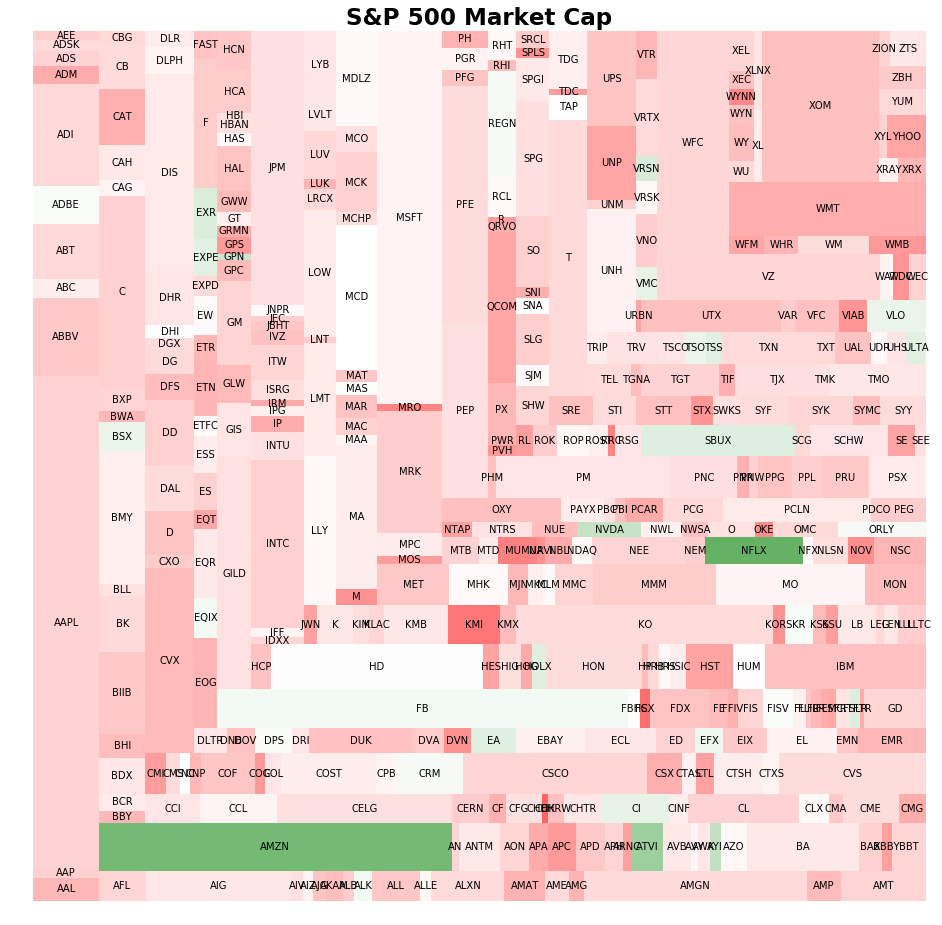

In [29]:
' Tree map '

nonNullValues = pd.notnull(marketCap2015['Market Cap']);
marketCap2015subset = marketCap2015[nonNullValues]

#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
colorTerm = 'Annual Return'

from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

norm = matplotlib.colors.Normalize(vmin=min(marketCap2015subset[colorTerm]), vmax=max(marketCap2015subset[colorTerm]))
colors = [cmap(norm(value)) for value in marketCap2015subset[colorTerm]]

#norm = matplotlib.colors.Normalize(vmin=min(marketCap2015subset[colorTerm]), vmax=max(marketCap2015subset[colorTerm]))
#colors = [matplotlib.cm.Reds(norm(value)) for value in marketCap2015subset[colorTerm]]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=marketCap2015subset['Ticker Symbol'],sizes=marketCap2015subset['Market Cap'], color = colors, alpha=.6)

plt.title("S&P 500 Market Cap",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

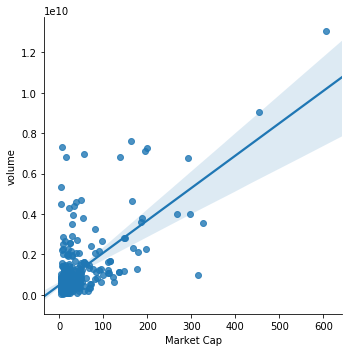

In [27]:
' Calculate total volume for 2015 for each stock '
adj_prices2015 = adj_prices[adj_prices['Year']==2015]
volumes2015 = adj_prices2015.groupby(['symbol'])['volume'].sum()
volumes2015 = volumes2015.to_frame()
volumes2015.reset_index(inplace=True)

' Merge with master data frame '
marketCap2015 = pd.merge(marketCap2015,volumes2015,left_on='Ticker Symbol',right_on='symbol',how='inner')

' Annual Volume Traded in 2015 vs Market Cap'
sns.lmplot(x='Market Cap',y='volume',data=marketCap2015);

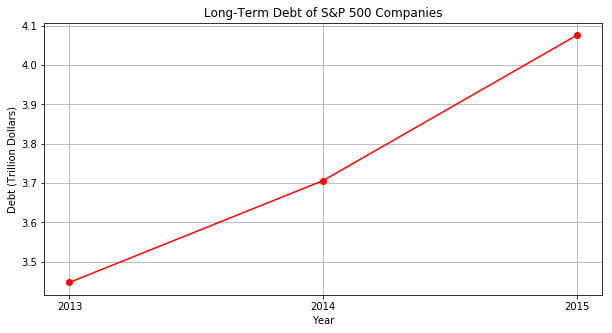

In [318]:
' Long Term Debt vs Time '
#adj_prices2015 = fundamentals[adj_prices['Year']==2015]
debt = fundamentals.groupby(['Year'])['Long-Term Debt'].sum()
debt = debt.to_frame()
debt['Long-Term Debt'] = debt['Long-Term Debt']/1000000000000.0
debt.reset_index(inplace=True)
debt = debt[debt.Year.isin([2013,2014,2015])]
#volumes2015.reset_index(inplace=True)
#debt.plot.line(x='Year',y='Long-Term Debt');
fig=plt.figure()
plt.plot(debt['Year'],debt['Long-Term Debt'],'r-o');
plt.xlabel('Year');
plt.ylabel('Debt (Trillion Dollars)');
plt.title('Long-Term Debt of S&P 500 Companies');
plt.xticks([2013,2014,2015])
plt.grid()
fig.savefig('./Figures/DebtTrendOverTime.png')

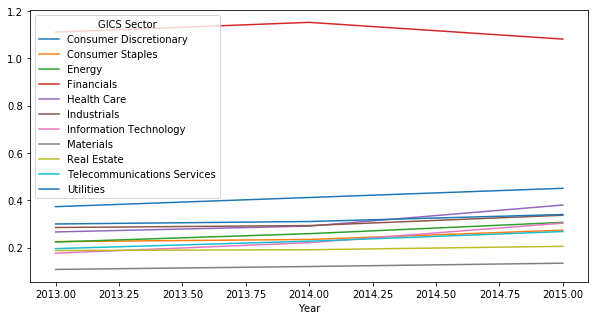

In [184]:
' Long Term Debt (by Sector) vs Time '
debt = fundamentals[fundamentals.Year.isin([2013,2014,2015])]
debt = debt.groupby(['Year','GICS Sector'])['Long-Term Debt'].sum()
debt = debt.to_frame()
debt['Long-Term Debt'] = debt['Long-Term Debt']/1000000000000.0
debt.reset_index(inplace=True)
debt = debt.pivot(index='Year', columns='GICS Sector', values='Long-Term Debt')
debt.plot();

<Figure size 720x360 with 0 Axes>

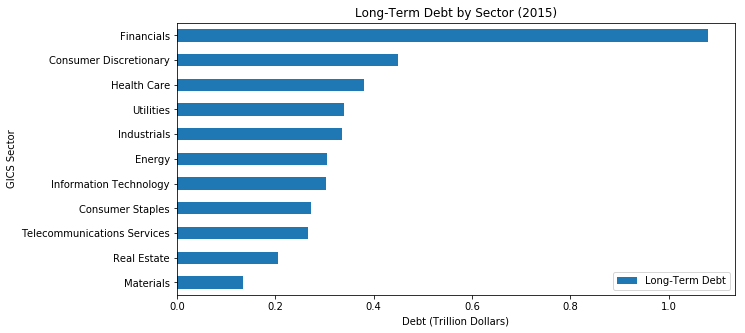

In [32]:
' Long Term Debt in 2015 by sector '
debt = fundamentals[fundamentals.Year.isin([2015])]
debt = debt.groupby(['GICS Sector'])['Long-Term Debt'].sum()
debt = debt.to_frame()
debt['Long-Term Debt'] = debt['Long-Term Debt']/1000000000000.0
debt.sort_values('Long-Term Debt',ascending=True,inplace=True)

fig=plt.figure()
debt.plot.barh();
plt.xlabel('Debt (Trillion Dollars)');
plt.title('Long-Term Debt by Sector (2015)');
fig.savefig('./Figures/DebtBySector.png')

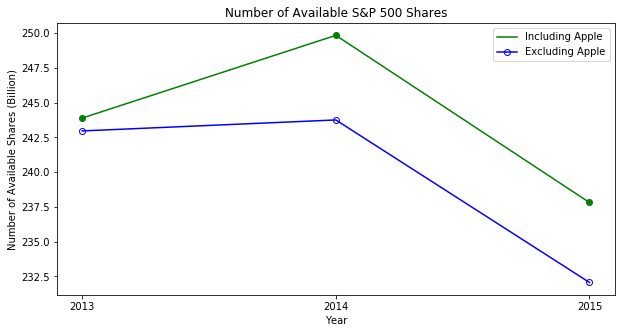

In [44]:
' Estimated Shares Outstanding vs Time '
shares = fundamentals.groupby(['Year'])['Estimated Shares Outstanding'].sum()
shares = shares.to_frame()
shares['Estimated Shares Outstanding'] = shares['Estimated Shares Outstanding']/1000000000.0
shares.reset_index(inplace=True)
shares = shares[shares.Year.isin([2013,2014,2015])]
#shares.reset_index(inplace=True)
ax = shares.plot.line(x='Year',y='Estimated Shares Outstanding',color='green',marker='o',label='Including Apple');

' Estimated Shares Outstanding vs Time (sans Apple)'
shares = fundamentals[~(fundamentals['Ticker Symbol']=='AAPL')].groupby(['Year'])['Estimated Shares Outstanding'].sum()
shares = shares.to_frame()
shares['Estimated Shares Outstanding'] = shares['Estimated Shares Outstanding']/1000000000.0
shares.reset_index(inplace=True)
shares = shares[shares.Year.isin([2013,2014,2015])]
#shares.reset_index(inplace=True)

shares.plot.line(x='Year',y='Estimated Shares Outstanding',ax=ax,color='blue',marker='o',markerfacecolor="None",label='Excluding Apple');
plt.xticks([2013,2014,2015]);
plt.ylabel('Number of Available Shares (Billion)');
plt.title('Number of Available S&P 500 Shares');

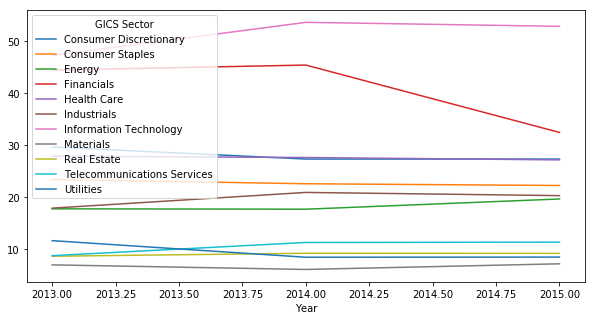

In [50]:
' Estimated Shares Outstanding (by Sector) vs Time '
shares = fundamentals[fundamentals.Year.isin([2013,2014,2015])]
shares = shares.groupby(['Year','GICS Sector'])['Estimated Shares Outstanding'].sum()
shares = shares.to_frame()
shares['Estimated Shares Outstanding'] = shares['Estimated Shares Outstanding']/1000000000.0
shares.reset_index(inplace=True)
shares = shares.pivot(index='Year', columns='GICS Sector', values='Estimated Shares Outstanding')
shares.plot();

In [51]:
' Look at 5 companies with largest market cap in 2015 '
marketCap2015[['Ticker Symbol','Market Cap']].sort_values('Market Cap',ascending=False).head(10)

,Ticker Symbol,Market Cap
2,AAPL,605.630662
274,MSFT,454.005128
430,XOM,326.985052
30,AMZN,314.711288
416,WFC,297.731546
153,FB,293.127904
218,JPM,266.761196
312,PFE,198.821941
421,WMT,197.840608
370,T,193.755886


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


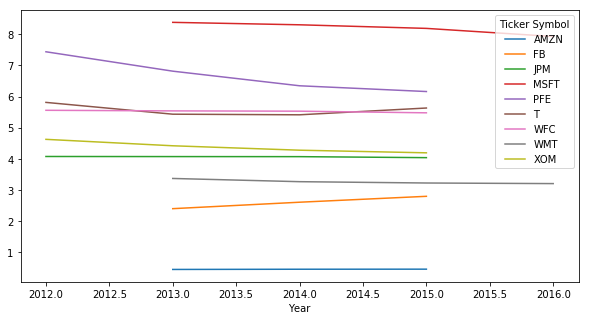

In [52]:
' Leaving out Apple '
top10 = fundamentals[fundamentals['Ticker Symbol'].isin(['FB','MSFT','XOM','AMZN','WFC','JPM','PFE','WMT','T'])]
top10['Estimated Shares Outstanding'] = top10['Estimated Shares Outstanding']/1000000000.0
top10 = top10.pivot(index='Year', columns='Ticker Symbol', values='Estimated Shares Outstanding')
top10.plot();

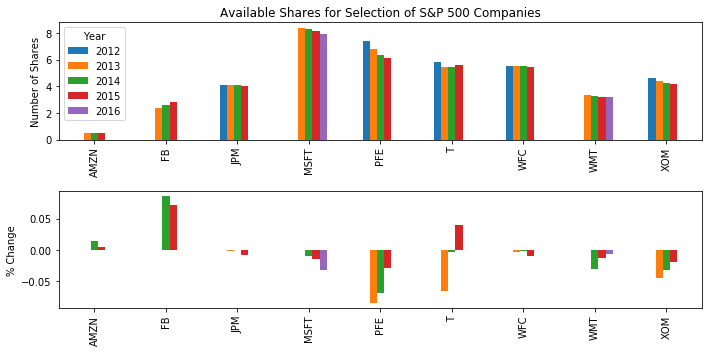

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=1)
ax=top10.transpose().plot(ax=axes[0],kind='bar')
ax.set_ylabel('Number of Shares')
ax.set_xlabel('')
ax.set_title('Available Shares for Selection of S&P 500 Companies')
ax=top10.pct_change().transpose().plot(ax=axes[1], kind='bar');
ax.set_ylabel('% Change')
plt.xlabel('')
ax.get_legend().remove()
plt.tight_layout()

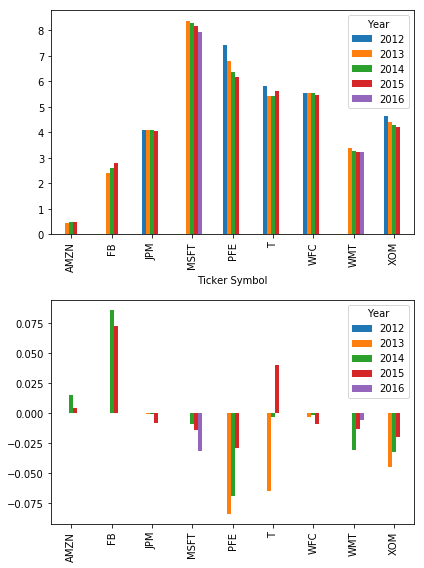

In [69]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(figsize=(6, 8) , nrows = nrows, ncols = ncols)
fig.tight_layout()

top10.transpose().plot(kind='bar',ax=axes[0])

top10.pct_change().transpose().plot(kind='bar',ax=axes[1]);

plt.xlabel('')
#ax.get_legend().remove()
plt.tight_layout()

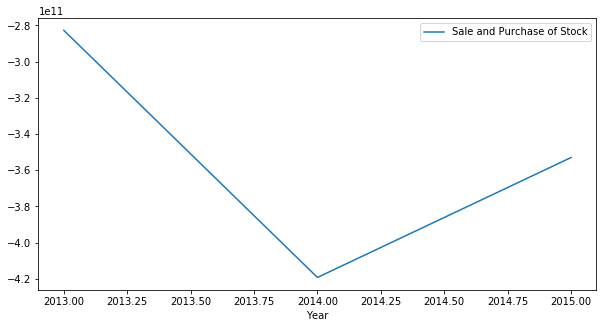

In [188]:
' Purchase of Stock vs Time '
sharePurchase = fundamentals.groupby(['Year'])['Sale and Purchase of Stock'].sum()
sharePurchase = sharePurchase.to_frame()
#sharePurchase['Sale and Purchase of Stock'] = sharePurchase['Sale and Purchase of Stock']/1000000000000.0
sharePurchase.reset_index(inplace=True)
sharePurchase = sharePurchase[sharePurchase.Year.isin([2013,2014,2015])]
#sharePurchase.reset_index(inplace=True)
sharePurchase.plot.line(x='Year',y='Sale and Purchase of Stock');
